In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

In [3]:
from sklearn.preprocessing import StandardScaler
from keras.datasets import mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

print (train_x.shape)
print (test_x.shape)
print (train_y.shape)
print (test_y.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
train_x = train_x.reshape((len(train_x), np.prod(train_x.shape[1:])))
test_x = test_x.reshape((len(test_x), np.prod(test_x.shape[1:])))

print (train_x.shape)
print (test_x.shape)

(60000, 784)
(10000, 784)


In [5]:
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x) # train_x.astype('float32') / 255.
test_x = scaler.fit_transform(test_x) # test_x = test_x.astype('float32') / 255.

print (train_x.shape)
print (test_x.shape)

(60000, 784)
(10000, 784)


In [6]:
x_data, y_data = train_x[:10000], train_y[:10000]

labels = np.unique(y_data)
n_features = x_data.shape[1]
print(labels)
print(n_features)

[0 1 2 3 4 5 6 7 8 9]
784


In [7]:
mean_vectors = []
for label in labels:
    mean_vectors.append(np.mean(x_data[y_data == label], axis=0))

m = np.mean(x_data, axis=0).reshape(1, n_features)
SB = np.zeros((n_features, n_features))
for i, mean_vec in enumerate(mean_vectors):
    n = x_data[y_data == i].shape[0]
    mi = mean_vec.reshape(1, n_features)
    mi_m = mi - m

    SB += n * np.dot(mi_m.T, mi_m)

s_mat = []
for label, mean in enumerate(mean_vectors):
    si = np.zeros((n_features, n_features))
    for row in x_data[y_data == label]:
        t = (row - mean).reshape(1, n_features)
        si += np.dot(t.T, t)
    s_mat.append(si)

SW = np.zeros((n_features, n_features))
for s_i in s_mat:
    SW += s_i

eig_vals, eig_vecs = np.linalg.eig(np.linalg.pinv(SW).dot(SB))

In [8]:
idx = eig_vals.argsort()[::-1]
eig_vals = eig_vals[idx]
eig_vecs = eig_vecs[:, idx]

W = eig_vecs[:, :2]
reduced_data = x_data.dot(W)

C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


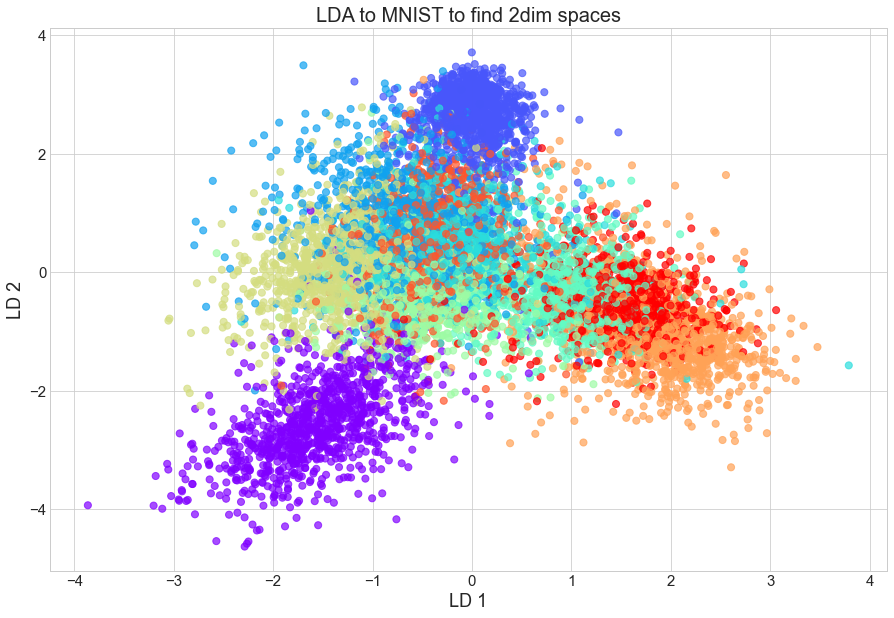

In [9]:
plt.figure(figsize=(15, 10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('LD 1', fontsize=18)
plt.ylabel('LD 2', fontsize=18)
plt.title('LDA to MNIST to find 2dim spaces', fontsize=20)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=y_data, 
            cmap='rainbow', alpha=0.7, s=50)